## IMPORT MODULES 

In [8]:
from TbdyMaterialModels import Mander
from TBDYConfimentBarsRules import ConfimentRebarSpace as crs

## VARIABLES

In [9]:
"""Units N,mm"""
Nd                      = 16000 
B                       = 400
H                       = 400
s                       = 80
TieRebarDiameter        = 10
LongnitRebarDiameter    = 14
ClearCoverConc          = 25
NumBarsTop,NumBarsInterior,NumBarsBot = 2,1,2
X_tiebars               = 3
Y_tiebars               = 3
fsy                     = 220
fywe                    = 220
eps_su                  = 0.08
f_co                    = 25
f_ce                    = 25

## TSC MATERIALS MODEL

* As = Boyuna donatı alanı
* ai = Kesit çevresindeki düşey donatıların eksenleri arasındaki uzaklık
* bo = Göbek betonunu sargılayan etriyelerin eksenleri arasında kalan kesit boyutu
* Ec = Betonun elastisite modülü
* Es = Donatı çeliğinin elastisite modülü
* fc = Sargılı betonda beton basınç gerilmesi
* fcc = Sargılı beton dayanımı
* fco = Sargısız betonun basınç dayanımı
* fe = Etkili sargılama basıncı
* fs = Donatı çeliğindeki gerilme
* fsy = Donatı çeliğinin akma dayanımı
* fsu = Donatı çeliğinin kopma dayanımı
* fyw = Enine donatının akma dayanımı
* ho = Göbek betonunu sargılayan etriyelerin eksenleri arasında kalan kesit boyutu
* ke = Sargılama Etkinlik Katsayısı
* s = Enine donatı aralığı
* ρs = Toplam enine donatının hacimsel oranı (dikdörtgen kesitlerde ρs = ρx + ρy )
* ρx , ρy = İlgili doğrultulardaki enine donatı hacim oranı
* εc = Beton basınç birim şekildeğiştirmesi
* εcu = Sargılı betondaki maksimum basınç birim şekildeğiştirmesi
* εsy = Donatı çeliğinin akma birim şekildeğiştirmesi
* εs = Donatı çeliğinin pekleşme başlangıcındaki birim şekildeğiştirmesi
* εsu = Donatı çeliğinin kopma birim şekildeğiştirmesi

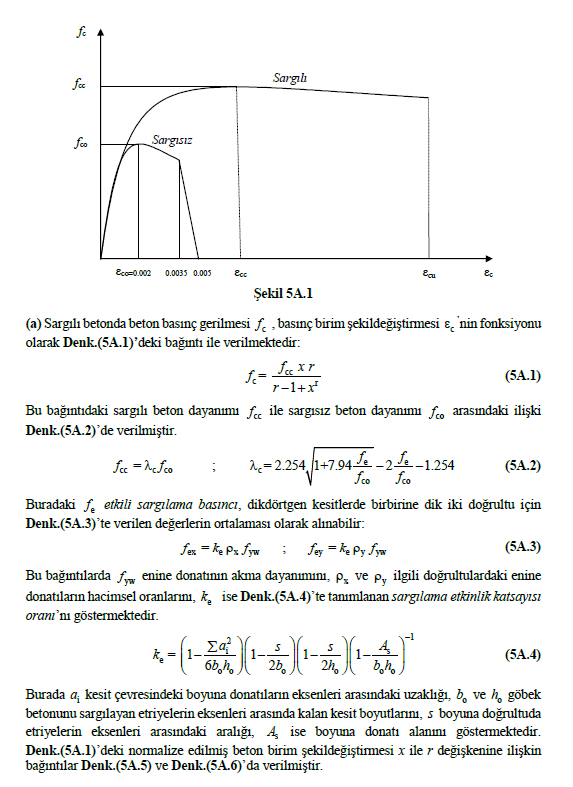    

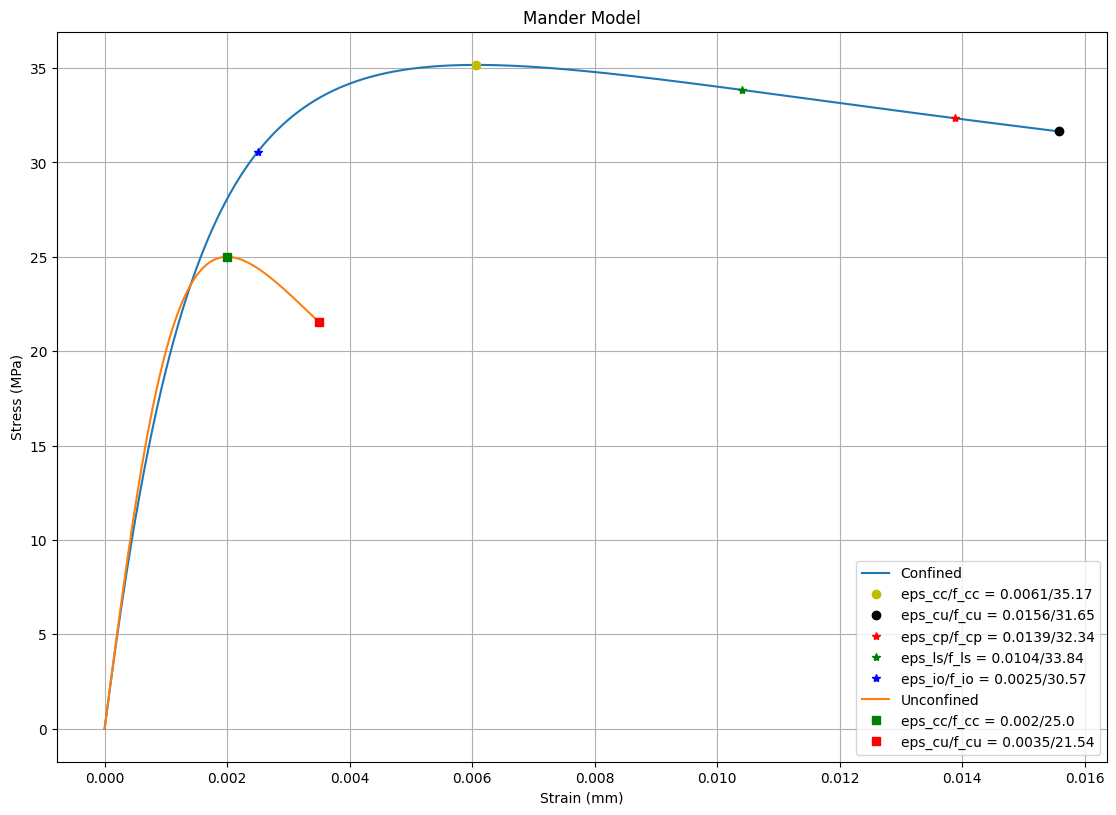

In [10]:
mander = Mander(B                    = B,
                H                    = H,
                s                    = s,
                TieRebarDiameter     = TieRebarDiameter,
                LongnitRebarDiameter = LongnitRebarDiameter,
                ClearCoverConc       = ClearCoverConc,
                NumBarsTop           = NumBarsTop,
                NumBarsInterior      = NumBarsInterior,
                NumBarsBot           = NumBarsBot,
                X_tiebars            = X_tiebars,
                Y_tiebars            = Y_tiebars,
                fsy                  = fsy,
                f_ywe                = fywe,
                eps_su               = eps_su,
                f_co                 = f_co,
                f_ce                 = f_ce
                )

mander.Plot_Manders()

## TSC COLUMN CONFIMENT BARS RULES

In [11]:
ETRIYEARALIKLARI = crs(Nd, B, H, ClearCoverConc, X_tiebars, Y_tiebars, f_co, fywe, TieRebarDiameter, LongnitRebarDiameter)
print(f"Uç sarılma bölgesi optimum etriye aralığı : {ETRIYEARALIKLARI.s_OptEndConfArea/10}cm,\nOrta sarılma bölgesi optimum etriye aralığı : {ETRIYEARALIKLARI.s_OptMiddleConfArea/10}cm,\nSarılma bölgesi dışındaki optimum etriye aralığı : {ETRIYEARALIKLARI.s_OtherConfAreaMax/10}cm")

Uç sarılma bölgesi optimum etriye aralığı : 8.4cm,
Orta sarılma bölgesi optimum etriye aralığı : 9.7cm,
Sarılma bölgesi dışındaki optimum etriye aralığı : 16.8cm


In [12]:
UcSarilmaBolgesiUzunlugu = ETRIYEARALIKLARI.Get_EndRegionConfinmentLength(b_max = max(B,H), ln = 2500)
UcSarilmaBolgesiUzunlugu

600.0

In [15]:
UcSarilmaBolgesiEtriyeAdeti = round(UcSarilmaBolgesiUzunlugu / ETRIYEARALIKLARI.s_OptEndConfArea , )
UcSarilmaBolgesiEtriyeAdeti

7.142857142857143

In [14]:
lb = ETRIYEARALIKLARI.Get_lb(fsy = fsy, fctd = 10, LognRebarDia = LongnitRebarDiameter, Nervur = True, LocationClass = 2)
OrtaSarilmaBolgesiUzunlugu = lb
OrtaSarilmaBolgesiUzunlugu

280